In [1]:
# Importing relevant libraries 

import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import distance
import seaborn as sns
import pandas as pd
import statistics as stat
import os


In [2]:
#Initiation-User defined values

#File to be saved location
os.chdir('C:\\Users\\dell\\Desktop')

#User inputs
noofhouses=5000                     #Number of houses to generate
sizeofframe=500                     #Length and width of field of view/frame. unit: Km/mile
cluster_centers = [(sizeofframe/2, sizeofframe/2)]#[(150,150),(300,300),(400,100)]  #Center(s) of data swath(s)
cluster_std = [sizeofframe/32]  #[(sizeofframe/8),(sizeofframe/8),(sizeofframe/16)]  #Standard deviation of the cluster/swath(s)
cluster_std2 = [(sizeofframe/32),(sizeofframe/8),(sizeofframe/32)]
nearestdistance=10


In [3]:
#Functions

#Random smudges of data representing Houses
def House_generator(noofhouses,sizeofframe,cluster_centers,cluster_std):
    X, y = make_blobs(n_samples=noofhouses, cluster_std=cluster_std, centers=cluster_centers, n_features=2, random_state=1)
    Houses=np.zeros(X.shape)

    for row in range(0,X.shape[0],1):
        if X[row,0]<(sizeofframe-10) and X[row,0]>10:
            if X[row,1]<(sizeofframe-10) and X[row,1]>10:
                Houses[row,0]=X[row,0]
                Houses[row,1]=X[row,1]
    
    return Houses

In [4]:
#Generating dispersion of Restaurants and Hospitals
def Servicecenter_generator(noofhouses,sizeofframe,qty_S= 10*math.ceil(0.0007*(noofhouses*3.69)**1.0375),radius=20):
    rangeX = (10, sizeofframe-10)
    rangeY = (10, sizeofframe-10)
    #qty_S = 10*math.ceil(0.0007*(noofhouses*3.69)**1.0375) based on quantitative data relating popualtion and restaurant numbers

    # Generate a set of all points within radius of the origin, to be used as offsets later
    deltas = set()
    for x in range(-radius, radius+1):
        for y in range(-radius, radius+1):
            if x*x + y*y <= radius*radius:
                deltas.add((x,y))
    
    randPoints = []
    excluded = set()
    i = 0
    while i<qty_S:
        x = random.randrange(*rangeX)
        y = random.randrange(*rangeY)
        if (x,y) in excluded: continue
        randPoints.append((x,y))
        i += 1
        excluded.update((x+dx, y+dy) for (dx,dy) in deltas)
    
    Servicecenter=np.array(randPoints)
    return Servicecenter


In [5]:
#Function to get nearest neighbor distances
def dist(Case,Ristoranti):
    distancelist=[]
    for casa in Case:
        for ristorante in Ristoranti:
            dist=distance.euclidean(casa,ristorante)
            distancelist.append(dist)
    return distancelist

In [6]:
#Function to get number of restaurents closer than nearestdistance
def numberofservicesnear(Case,Ristoranti,nearestdistance=10):
    distancelist=[]
    for casa in Case:
        c=0
        for ristorante in Ristoranti:
            dist=distance.euclidean(casa,ristorante)
            if dist<nearestdistance:
                c=c+1
        if c>0:
            distancelist.append(c)
    return distancelist

def histogramer(neighbors,title,xaxis,houses=noofhouses):
    bins=np.linspace(math.floor(neighbors.min()),math.ceil(neighbors.max()),100)
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel('Number frequency')
    ax.hist(neighbors, bins)
    return plt.show()


def plottingconfiguration(Case,Ristoranti,Ospedali,title):
    a1=plt.scatter(Houses[:, 0], Houses[:, 1], color="gray", s=10, label="Houses")
    a2=plt.scatter(Restaurants[:, 0], Restaurants[:, 1], color="blue", s=10, label="Restaurants")
    a3=plt.scatter(Hospitals[:, 0], Hospitals[:, 1], color="red", s=10, label="Hospital")
    plt.title(title)
    plt.xlabel('Distance in Km')
    plt.ylabel('Distance in Km')
    plt.legend((a1,a2,a3),('Houses', 'Restaurants', 'Hospitals'),scatterpoints=1,ncol=3,fontsize=8)
    return plt.show()

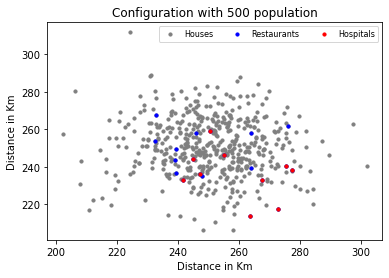

txt file 1 complete


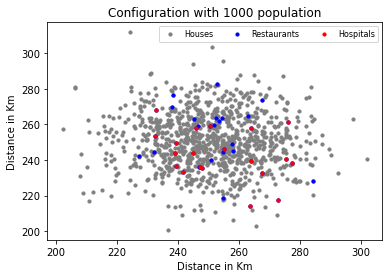

txt file 2 complete


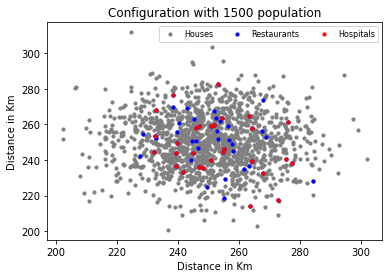

txt file 3 complete


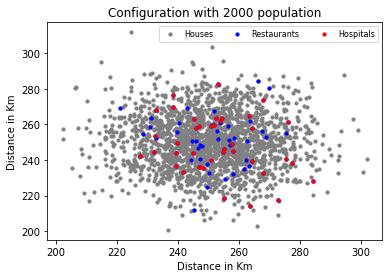

In [ ]:
#Body

#Generating points
#Houses=np.array(House_generator(noofhouses,sizeofframe,cluster_centers,cluster_std))
#Restaurants=House_generator(50*math.ceil(0.0007*(noofhouses*3.69)**1.0375),sizeofframe,cluster_centers,sizeofframe/4)
#Hospitals=House_generator(10*math.ceil(0.0007*(noofhouses*3.69)**1.0375),sizeofframe,cluster_centers,sizeofframe/4)
#Restaurants=Servicecenter_generator(noofhouses,sizeofframe)
#Hospitals=Servicecenter_generator(noofhouses,sizeofframe,5*math.ceil(0.0007*(noofhouses*3.69)**1.0375),5)

#Plotting
#plottingconfiguration(Houses,Restaurants,Hospitals,"Configuration modelled")



#Yummydistances=np.array(dist(Houses,Restaurants))
#Healthydistances=np.array(dist(Houses,Hospitals))
#histogramer(Yummydistances,"Distance of a Restaurant from a home","Distance in km")
#histogramer(Healthydistances, Distance of a Hospital from a home","Distance in km")


#Yummyneighbors=np.array(numberofservicesnear(Houses,Restaurants))
#Yummyneighbors=Yummyneighbors[Yummyneighbors!=Yummyneighbors.max()]
#Healthyneighbors=np.array(numberofservicesnear(Houses,Hospitals))
#Healthyneighbors=Healthyneighbors[Healthyneighbors!= Healthyneighbors.max()]
#histogramer(Yummyneighbors,"Nearest Restaurants", "No of restaurants")
#histogramer(Healthyneighbors,"Nearest Hospitals","No of hospitals")

Excelwriter = pd.ExcelWriter('Multiplepopdensity.xlsx', engine='xlsxwriter')
Datalist=[]
namecounter=[]
noofHouseholds=np.linspace(500,2500,num=5,dtype=int)
for j in range(0,len(noofHouseholds),1):
    Houses=np.array(House_generator(noofHouseholds[j],sizeofframe,cluster_centers,cluster_std))
    Restaurants=House_generator(10*math.ceil(0.0007*(noofHouseholds[j]*3.69)**1.0375),sizeofframe,cluster_centers,cluster_std)
    Hospitals=House_generator(5*math.ceil(0.0007*(noofHouseholds[j]*3.69)**1.0375),sizeofframe,cluster_centers,cluster_std)
    
    plottingconfiguration(Houses,Restaurants,Hospitals,"Configuration with "+str(noofHouseholds[j])+" population")
    
    Summary = pd.DataFrame(columns = ['Radius (km)','No. houses with at least 1 restaurant','No. houses with at least 1 hospitals','Av_rst','Av_hsp','Med_rst','Med_hsp','Max_rst','Max_hsp'])
    radiusofinfluence=np.array(range(1,int(0.1*sizeofframe),1))

    for i in range(0,len(radiusofinfluence),1):
        radius=radiusofinfluence[i]
    
        Yummyneighbors=np.array(numberofservicesnear(Houses,Restaurants,radius))
        if len(Yummyneighbors)>0:
            Yummyneighbors=Yummyneighbors[Yummyneighbors!=Yummyneighbors.max()]
        else:
            Yummyneighbors=[]
        
        Healthyneighbors=np.array(numberofservicesnear(Houses,Hospitals,radius))
        if len(Healthyneighbors)>0:      
            Healthyneighbors=Healthyneighbors[Healthyneighbors!= Healthyneighbors.max()]
        else:
              Healthyneighbors=[]      
        
        No_houses_with_one_rest=len(Yummyneighbors)
        No_houses_with_one_hosp=len(Healthyneighbors)
    
        if len(Yummyneighbors)>0:
            Mean_rests=stat.mean(Yummyneighbors)        
            Median_rests=stat.median(Yummyneighbors)
            Max_rests=Yummyneighbors.max()
        else:
            Mean_rests=0       
            Median_rests=0
            Max_rests=0   
            
        if len(Healthyneighbors)>0:        
            Mean_hosps=stat.mean(Healthyneighbors)
            Median_hosps=stat.median(Healthyneighbors)      
            Max_hosps=Healthyneighbors.max()
        else:
            Mean_hosps=0       
            Median_hosps=0
            Max_hosps=0  
            
        All = np.column_stack((radius,No_houses_with_one_rest,No_houses_with_one_hosp,Mean_rests,Mean_hosps,Median_rests,Median_hosps,Max_rests,Max_hosps))
        X = pd.DataFrame(All,columns = ['Radius (km)','No. houses with at least 1 restaurant','No. houses with at least 1 hospitals','Av_rst','Av_hsp','Med_rst','Med_hsp','Max_rst','Max_hsp'])
        Summary = Summary.append(X)
    
    Datalist.append(Summary)
    namecounter.append('Population'+str(noofHouseholds[j]))
    print("txt file "+str(j+1)+" complete")

for i, file in enumerate (Datalist):
    file.to_excel(Excelwriter, sheet_name=str(namecounter[i]),index=False)    

Excelwriter.save()
Excelwriter.close()